In [2]:
import pandas as pd
df  = pd.read_csv("homeprice.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


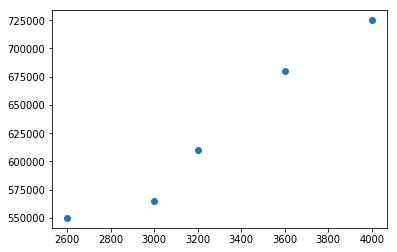

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df.area,df.price)
plt.show()

In [6]:
from sklearn import linear_model

reg  = linear_model.LinearRegression()
reg.fit(df[["area"]],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
reg.predict([[3900]])

array([710188.35616438])

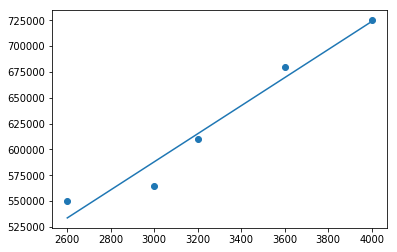

In [8]:
plt.scatter(df.area,df.price)
plt.plot(df.area,reg.predict(df[["area"]]))

In [9]:
reg.intercept_

180616.43835616432

In [17]:
df1 = pd.read_csv("area.csv")
df1

,area
0,3300
1,5000
2,2300
3,3486
4,4800
5,7800
6,9600
7,4300
8,2345
9,9876


In [18]:
reg.predict(df1)

array([ 628715.75342466,  859554.79452055,  492928.08219178,
        653972.26027397,  832397.26027397, 1239760.2739726 ,
       1484178.08219178,  764503.42465753,  499038.52739726,
       1521655.47945205,  800758.73287671, 1398631.84931507,
        922017.12328767,  649083.90410959, 1071926.71232877,
        950532.53424658,  619753.76712329,  799808.21917808,
        799808.21917808])

In [19]:
a = reg.predict(df1)
df1["price"] = a
df1

,area,price
0,3300,6.287158e+05
1,5000,8.595548e+05
2,2300,4.929281e+05
3,3486,6.539723e+05
4,4800,8.323973e+05
5,7800,1.239760e+06
6,9600,1.484178e+06
7,4300,7.645034e+05
8,2345,4.990385e+05
9,9876,1.521655e+06


In [20]:
df1.to_csv("predicted.csv")

In [21]:
df2 = pd.read_csv("hirings.csv")

In [22]:
df2

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [24]:
median_test = df2.test_score.median()
median_test

8.0

In [27]:
df2.test_score.fillna(median_test)

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     8.0
7     7.0
Name: test_score, dtype: float64

In [28]:
df2.test_score = df2.test_score.fillna(median_test)
df2

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [30]:
df2.experience= df2.experience.fillna("zero")
df2

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [31]:
from word2number import w2n

df2.experience.apply(w2n.word_to_num)

0     0
1     0
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [32]:
df2.experience = df2.experience.apply(w2n.word_to_num)

In [33]:
df2

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [36]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(df2[["experience","test_score","interview_score"]],df2.salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
model.predict([[4,5,8]])

array([55859.5342067])

In [38]:
model.intercept_

17737.26346433768

In [39]:
model.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [40]:
model.score(df2[["experience","test_score","interview_score"]],df2.salary)

0.961678000257796